# geolocation

- formulation of a solver.

- statistical simulations in order to determine sources of uncertainty

---

## formulation

<img src='schematic.jpeg' alt='Drawing' align='right' style='width: 300px;'/>

We want to find the float horizontal position $\underline{x}=(x,y)$ of an underwater float 
given a number of **known variables**:
- $\underline{x}_s^i$ : source surface float horizontal position
- $t_e^i$ : time of emission for source $i$
- $\tilde{t}_r^i$ : time of reception of the signal emitted by source $i$ by the underwater float
- $\epsilon_i$ : signal detection, $\epsilon_i=1$ (detection) or $1$ (no detection)
- $z$ : underwater float depth(perfect knowledge), not used for now

'Perfect' knowledge is assumed for known variables wich amounts to say potential errors on there
estimates may be neglected.

**Unknown variables** are:
- $\underline{x}=(x,y)$ : underwater float position
- $\delta t$ : underwater float clock offset, $\delta t = \tilde{t}_r^i - t_r^i$, where 
$t_r^i$ is the true time of reception
- $\delta \underline{x}^i$ : vector difference between source $i$ transducer position and surface float position, $\delta \underline{x}^i = \underline{x}_t^i - \underline{x}_s^i$
- $\delta c (\underline{x},\underline{x}_t^i)$ : difference between equivalent celerity defined as 
$c(\underline{x},\underline{x}_t^i) = ||\underline{x} - \underline{x}_t^i ||/(t_r^i - t_e^i)$ and its background (a priori) estimate $c_b$, $\delta c (\underline{x},\underline{x}_t^i) = c(\underline{x},\underline{x}_t^i) - c_b$.

A priori standard deviations for $\underline{x}$, $\delta t$, $\delta \underline{x}^i$, $\delta c (\underline{x},\underline{x}_t^i)$ are
assumed to be known and given by: $e_x$, $e_{\delta t}$, $e_{\delta x}$, $e_{\delta c}$.

Background (a priori) estimates for $\underline{x}$, $\delta t$, $\delta \underline{x}^i$, $\delta c (\underline{x},\underline{x}_t^i)$ may eventually be provided. We assume all are 0 for now except
for the float position $\underline{x}_b=(x=1km, y=0km)$.


We impose **hard contraints** for each source-float acoustic travel:

$$
\begin{align*}
||\underline{x} - \underline{x}_s^i - \delta \underline{x}^i || = \big (c_b + \delta c(\underline{x},\underline{x}_t^i) \big ) \times (\tilde{t}_r^i + \delta t - t_e^i),
\end{align*}
$$

The estimate of the underwater float position $\underline{\hat{x}}$ minimizes:

$$
\begin{align*}
J(\mathbf{x}, \delta t, \delta \underline{x}_i, \delta c (\underline{x},\underline{x}_t^i)) = 
||\underline{x} - \underline{x}_b||^2 /e_x^2
+ \delta t^2 / e_{\delta t}^2 
+ \sum_i \epsilon_i \times ( ||\delta \underline{x}_i||^2 / e_{\delta x}^2
+ \delta c (\underline{x},\underline{x}_t^i)^2 / e_c^2 )
\end{align*}
$$

subject to the hard constraints listed above.

The hard constraint may used to estimate $\delta c$ and plug it into the functional J:
$$
\begin{align*}
J(\mathbf{x}, \delta t, \delta \underline{x}_i) = 
||\underline{x} - \underline{x}_b||^2 /e_x^2
+ \delta t^2 / e_{\delta t}^2 
+ \sum_i \epsilon_i \times \Big \{ \frac{||\delta \underline{x}_i||^2} {e_{\delta x}^2}
+ \frac{\big [||\underline{x} - \underline{x}_s^i - \delta \underline{x}^i ||/(\tilde{t}_r^i + \delta t - t_e^i) - c_b \big ]^2} {e_c^2} \Big \}
\end{align*}
$$

We assume $\epsilon_i=1$ in all examples below for simplicity.

We have assumed simultaneous (working assumption) emission of sources.
The underwater float velocity may be added as an extra variable (future addition).

In [1]:

# import libraries
import numpy as np
import matplotlib.pyplot as plt

from clib.geolocation import *


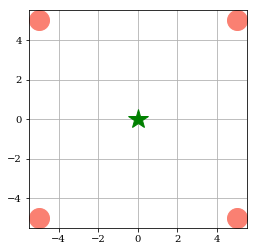

In [2]:
        
### create an ensemble of sources

# square formation:
dx=10. *1.e3 # in meters
sources=[]
sources.append(source(-dx*.5,-dx*.5))
sources.append(source(dx*.5,-dx*.5))
sources.append(source(dx*.5,dx*.5))
sources.append(source(-dx*.5,dx*.5))
#sources.append(source(0.,dx*.25))
Ns = len(sources)

### init a receiver
r=receiver(0. *1.e3,0. *1.e3)

### plot
plt.figure()
ax=plt.subplot(111)
[s.plot() for s in sources]
r.plot()
ax.grid()
#ax.set_xlim([-1.,21.])
#ax.set_ylim([-1.,11.])
ax.set_aspect('equal')
plt.show()


In [3]:
for i, s in enumerate(sources):
    print('Distance source %d - float = %.2f km' %(i, dist(s,r)/1.e3))
    print('  horizontal offset for a sound celerity difference of %.1f m/s = %.2f m' %(10., dist(s,r)*10./1500.))

Distance source 0 - float = 7.07 km
  horizontal offset for a sound celerity difference of 10.0 m/s = 47.14 m
Distance source 1 - float = 7.07 km
  horizontal offset for a sound celerity difference of 10.0 m/s = 47.14 m
Distance source 2 - float = 7.07 km
  horizontal offset for a sound celerity difference of 10.0 m/s = 47.14 m
Distance source 3 - float = 7.07 km
  horizontal offset for a sound celerity difference of 10.0 m/s = 47.14 m


---

## celerity statistical simulations

For each source-drifter acoustic path, a random value is drawn around **1500m/s**.
The standard deviation of the celerity draw is **10 m/s**.

In [4]:
Nmc = 100

x=np.zeros(Nmc)
y=np.zeros(Nmc)
dt=np.zeros(Nmc)
#dt_truth=np.zeros(Nmc)
for i in range(Nmc):
    [s.draw_celerity(10.) for s in sources]
    #[s.draw_dxdy(10.) for s in sources]
    #r.draw_clock_drift(1.)
    #dt_truth[i] = r.dt
    x[i], y[i], dt[i], dx, dy, success, message, res = geolocalize(r, sources, disp=False)

Text(0,0.5,'y [m]')

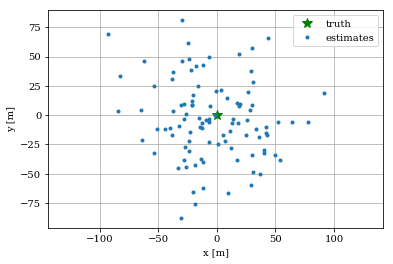

In [5]:
plt.figure()
ax=plt.subplot(111)
ax.plot(r.x,r.y,'*', color='green', markersize=10, label='truth')
ax.plot(x,y,'.', label='estimates')
ax.axis('equal')
ax.grid()
ax.legend()
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')

---

## clock drift statistical simulations

A random value of the float clock offset is drawn around **0s**.
The standard deviation of the float clock offset is **1s**.

In [6]:
#Nmc = 10

x=np.zeros(Nmc)
y=np.zeros(Nmc)
dt=np.zeros(Nmc)
dt_truth=np.zeros(Nmc)
for i in range(Nmc):
    #[s.draw_celerity(10.) for s in sources]
    #[s.draw_dxdy(10.) for s in sources]
    r.draw_clock_drift(1.)
    dt_truth[i] = r.dt
    x[i], y[i], dt[i], dx, dy, success, message, res = geolocalize(r, sources, disp=False)

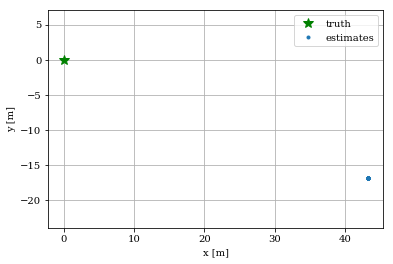

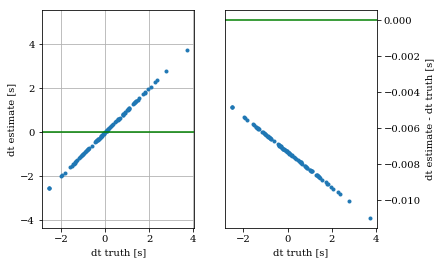

In [7]:
plt.figure()
ax=plt.subplot(111)
ax.plot(r.x,r.y,'*', color='green', markersize=10, label='truth')
ax.plot(x,y,'.', label='estimates')
ax.axis('equal')
ax.grid()
ax.legend()
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')

plt.figure()
ax = plt.subplot(121)
#lax = ax[0]
ax.plot(dt_truth, dt,'.')
ax.axhline(0.,color='green')
ax.axis('equal')
ax.grid()
ax.set_ylabel('dt estimate [s]')
ax.set_xlabel('dt truth [s]')
#
ax = plt.subplot(122)
ax.plot(dt_truth, dt-dt_truth,'.')
ax.axhline(0.,color='green')
ax.set_xlabel('dt truth [s]')
ax.set_ylabel('dt estimate - dt truth [s]')
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')


---

##  transducer horizontal offset statistical simulations

For each source, a random offset of the transducer horizontal position with respect to the source surface float is drawn around **0m**.
The standard deviation of random draws is **10 m**.

In [8]:
#Nmc = 100

x=np.zeros(Nmc)
y=np.zeros(Nmc)
dt=np.zeros(Nmc)
for i in range(Nmc):
    #[s.draw_celerity(10.) for s in sources]
    [s.draw_dxdy(10.) for s in sources]
    #r.draw_clock_drift(1.)
    #dt_truth[i] = r.dt
    x[i], y[i], dt[i], dx, dy, success, message, res = geolocalize(r, sources, disp=False)

Text(0,0.5,'y [m]')

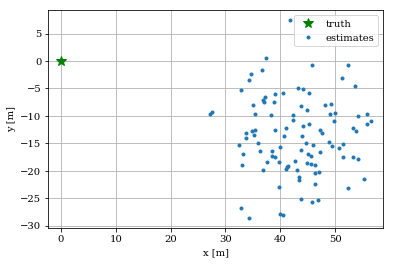

In [9]:
plt.figure()
ax=plt.subplot(111)
ax.plot(r.x,r.y,'*', color='green', markersize=10, label='truth')
ax.plot(x,y,'.', label='estimates')
ax.axis('equal')
ax.grid()
ax.legend()
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')

--- 

## error on relative position

For draws of celerity, move the float by 100m and compute the distance between positions